In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [3]:
df = pd.read_csv('2021년_k=4_K_prototype.csv')
df.head()

,Unnamed: 0,v1,gb3,gb2,sex_ccd,cln_age_r,daw_ccd_r,apv_ts_dl_tm_r,vlm,usec,month,v2v3,Cluster Labels
0,0,부산,여행,숙박,F,20,WHITE,휴식,3002100,78,12,부산-남구,0
1,1,전남,여행,교통,F,20,WHITE,활동,342682500,11832,12,대전-동구,3
2,2,전북,여행,교통,F,60,WHITE,활동,75727900,3225,6,대전-동구,1
3,3,대전,여행,교통,M,40,RED,휴식,51028600,2645,11,대전-동구,0
4,4,세종,여행,교통,M,20,WHITE,휴식,31370200,2397,11,대전-동구,0


In [4]:
df.groupby('Cluster Labels').agg({
    'v1' : lambda x:x.mode(),
    'v2v3' : lambda x:x.mode(),
    'gb2' : lambda x:x.mode(),
    'usec' : 'mean',
    'cln_age_r' : 'mean',
    'month' : lambda x:x.mode(),
    'daw_ccd_r' : lambda x:x.mode(),
    'vlm' : 'mean',
    'sex_ccd' : lambda x:x.mode(),
    'gb3' : 'count'
}).reset_index()

,Cluster Labels,v1,v2v3,gb2,usec,cln_age_r,month,daw_ccd_r,vlm,sex_ccd,gb3
0,0,경기,제주-제주시,숙박,93.990000,30.444674,10,WHITE,4.494729e+06,M,935877
1,1,경기,제주-제주시,숙박,72.945273,54.204868,10,WHITE,3.881218e+06,M,518901
2,2,서울,대전-동구,교통,65461.512195,33.623693,11,WHITE,2.101190e+09,F,287
3,3,서울,대전-동구,교통,9828.887539,36.513897,11,WHITE,4.382339e+08,M,5433


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460498 entries, 0 to 1460497
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   Unnamed: 0      1460498 non-null  int64 
 1   v1              1460498 non-null  object
 2   gb3             1460498 non-null  object
 3   gb2             1460498 non-null  object
 4   sex_ccd         1460498 non-null  object
 5   cln_age_r       1460498 non-null  int64 
 6   daw_ccd_r       1460498 non-null  object
 7   apv_ts_dl_tm_r  1460498 non-null  object
 8   vlm             1460498 non-null  int64 
 9   usec            1460498 non-null  int64 
 10  month           1460498 non-null  int64 
 11  v2v3            1460498 non-null  object
 12  Cluster Labels  1460498 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 144.9+ MB


In [6]:
cluster0 = df[df['Cluster Labels'] == 0 ]
cluster0.v1.value_counts()

경기      119408
서울      110777
인천       72059
부산       58317
경남       56847
충남       54306
충북       54044
경북       52944
대구       49606
강원       48813
대전       47422
전남       41342
전북       40615
광주       40430
울산       35603
세종       25155
제주       19248
구분없음      8941
Name: v1, dtype: int64

In [7]:
cluster3 = df[df['Cluster Labels'] == 3 ]
cluster3.v1.value_counts()

서울    1840
경기    1550
부산     264
대구     253
경북     201
인천     177
대전     166
충남     157
경남     138
강원     134
충북     119
전남     115
울산      79
전북      76
광주      70
제주      50
세종      44
Name: v1, dtype: int64

In [8]:
cluster0.v2v3.value_counts()

제주-제주시     23566
서울-강남구     18255
인천-중구      14694
부산-해운대구    13594
제주-서귀포시    13570
           ...  
경남-의령군       604
전북-진안군       550
경북-고령군       440
경북-영양군       353
전북-장수군       345
Name: v2v3, Length: 229, dtype: int64

In [9]:
cluster3.v2v3.value_counts()

대전-동구      2283
서울-강남구      865
서울-강서구      596
제주-제주시      510
서울-중구       272
제주-서귀포시     193
서울-서초구      124
경기-안양시      114
경기-성남시      113
부산-강서구       56
강원-홍천군       54
강원-평창군       38
경기-과천시       34
서울-종로구       33
서울-송파구       26
울산-동구        18
서울-용산구       18
서울-영등포구      16
강원-속초시       11
경기-용인시       10
부산-해운대구       9
인천-중구         7
강원-정선군        3
경북-경주시        3
강원-동해시        2
대구-수성구        2
대전-유성구        1
강원-고성군        1
서울-구로구        1
경기-평택시        1
부산-북구         1
경기-수원시        1
전북-전주시        1
전남-화순군        1
부산-기장군        1
경남-창원시        1
경기-연천군        1
울산-남구         1
충북-청주시        1
서울-광진구        1
전남-목포시        1
강원-삼척시        1
광주-북구         1
경북-포항시        1
경기-안성시        1
전북-남원시        1
서울-마포구        1
충남-천안시        1
인천-연수구        1
Name: v2v3, dtype: int64

In [2]:
df_8group = pd.read_csv('2021년_k=8_K_prototype.csv')

In [3]:
df_8group.groupby('Cluster Labels').agg({
    'v1' : lambda x:x.mode(),
    'v2v3' : lambda x:x.mode(),
    'gb2' : lambda x:x.mode(),
    'usec' : 'mean',
    'cln_age_r' : 'mean',
    'month' : lambda x:x.mode(),
    'daw_ccd_r' : lambda x:x.mode(),
    'vlm' : 'mean',
    'sex_ccd' : lambda x:x.mode(),
    'gb3' : 'count'
}).reset_index()

,Cluster Labels,v1,v2v3,gb2,usec,cln_age_r,month,daw_ccd_r,vlm,sex_ccd,gb3
0,0,서울,대전-동구,교통,4874.958979,37.011006,10,WHITE,2.090373e+08,M,11994
1,1,경기,제주-제주시,숙박,57.720042,56.126130,10,RED,3.083239e+06,F,288386
2,2,서울,인천-중구,숙박,61.494668,47.122536,1,WHITE,3.627883e+06,M,345391
3,3,인천,제주-제주시,숙박,70.339781,41.037628,11,RED,3.759157e+06,F,206471
4,4,서울,대전-동구,교통,71232.257384,33.164557,"[5, 11]",WHITE,2.225920e+09,F,237
5,5,서울,대전-동구,교통,18019.954006,35.919881,11,WHITE,8.517092e+08,M,1348
6,6,서울,제주-제주시,숙박,75.473444,23.927779,10,WHITE,3.523651e+06,M,324919
7,7,경기,제주-제주시,숙박,76.052042,27.037643,5,RED,3.401392e+06,F,281752


In [4]:
cluster0 = df_8group[df_8group['Cluster Labels'] == 0 ]
cluster1 = df_8group[df_8group['Cluster Labels'] == 1 ]
cluster2 = df_8group[df_8group['Cluster Labels'] == 2 ]
cluster3 = df_8group[df_8group['Cluster Labels'] == 3 ]
cluster4 = df_8group[df_8group['Cluster Labels'] == 4 ]
cluster5 = df_8group[df_8group['Cluster Labels'] == 5 ]
cluster6 = df_8group[df_8group['Cluster Labels'] == 6 ]
cluster7 = df_8group[df_8group['Cluster Labels'] == 7 ]

In [5]:
import plotnine

In [6]:
cluster0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11994 entries, 1 to 1459537
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      11994 non-null  int64 
 1   v1              11994 non-null  object
 2   gb3             11994 non-null  object
 3   gb2             11994 non-null  object
 4   sex_ccd         11994 non-null  object
 5   cln_age_r       11994 non-null  int64 
 6   daw_ccd_r       11994 non-null  object
 7   apv_ts_dl_tm_r  11994 non-null  object
 8   vlm             11994 non-null  int64 
 9   usec            11994 non-null  int64 
 10  month           11994 non-null  int64 
 11  v2v3            11994 non-null  object
 12  Cluster Labels  11994 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 1.3+ MB


In [7]:
# 20대
print(cluster6.gb2.value_counts())

숙박      199179
체험       56200
교통       36955
관광쇼핑     25458
여행사       7127
Name: gb2, dtype: int64


In [8]:
# 20대
cluster7.gb2.value_counts()

숙박      154432
체험       61811
교통       31755
관광쇼핑     27493
여행사       6261
Name: gb2, dtype: int64

In [9]:
cluster6.v2v3.value_counts(sort=True)

제주-제주시     7930
서울-강남구     6039
인천-중구      5469
부산-해운대구    4585
제주-서귀포시    4437
           ... 
전북-임실군      172
전북-진안군      123
경북-영양군      110
전북-장수군      105
경북-고령군       99
Name: v2v3, Length: 229, dtype: int64

In [10]:
cluster7.v2v3.value_counts(sort=True)

제주-제주시     7535
서울-강남구     5886
인천-중구      4625
부산-해운대구    4497
제주-서귀포시    4379
           ... 
충남-청양군      132
경북-고령군      129
경남-의령군      126
전북-장수군       71
경북-영양군       49
Name: v2v3, Length: 229, dtype: int64

In [11]:
gb2_act = df_8group[df_8group['gb2'] == '체험' ]

In [12]:
# 다르게 보면 순위가 상당히 낮게 나오는데(어떤 그룹에서 봐도 100위권 밖)
# 체험 소비로 보면 상당히 우수해보임.
gb2_act.v2v3.value_counts(sort=True)

서울-송파구     6931
충남-태안군     5366
전남-여수시     5232
경북-경주시     4743
부산-해운대구    4638
           ... 
전북-진안군       58
경북-고령군       52
부산-동구        52
경북-영양군       15
강원-화천군       13
Name: v2v3, Length: 229, dtype: int64

In [13]:
# 여성 20-30대 그룹에서 체험형 소비 순위 봤을때도 양호
cluster7[cluster7['gb2'] == '체험' ].v2v3.value_counts(sort=True)

서울-송파구     1511
충남-태안군     1164
전남-여수시     1092
경북-경주시     1074
부산-해운대구    1040
           ... 
전북-진안군       10
서울-구로구       10
충남-금산군        7
강원-화천군        6
부산-동구         3
Name: v2v3, Length: 228, dtype: int64

In [14]:
# 남성의 경우 비교적 낮지만 상위권에 랭크됨.
cluster6[cluster6['gb2'] == '체험'].v2v3.value_counts(sort=True)

서울-송파구     1593
충남-태안군     1123
전남-여수시     1111
부산-서구      1030
부산-해운대구    1022
           ... 
충남-청양군        7
전북-진안군        4
경북-고령군        4
경북-영양군        3
강원-화천군        2
Name: v2v3, Length: 229, dtype: int64

잘못된 플롯 고치기.

In [3]:
ndf = pd.read_csv(r'2022년\카드데이터\제천시 구매내역 데이터.csv')

In [4]:
ndf.head()

,v1,v2,v3,gb3,gb2,sex_ccd,cln_age_r,ta_ym,daw_ccd_r,apv_ts_dl_tm_r,vlm,usec
0,서울,충북,제천시,취미오락,외식,F,60,202112,WHITE,활동,19846900,729
1,경기,충북,제천시,취미오락,외식,M,40,202111,RED,휴식,27099200,527
2,충북,충북,제천시,취미오락,패션쇼핑,M,20,202109,WHITE,활동,34355100,426
3,경기,충북,제천시,스포츠활동,골프,M,50,202109,RED,활동,41793800,193
4,대구,충북,제천시,취미오락,종합쇼핑,M,40,202107,RED,활동,1263400,45


In [5]:
outerdf = ndf[ndf.v1 != '충북']

In [32]:
nouter = outerdf.groupby('gb2').agg({
    'usec' : 'sum'
}).sort_values('usec', ascending = False).reset_index()
nouter

,gb2,usec
0,외식,10725102
1,종합쇼핑,3468494
2,인터넷게임,546867
3,미용,303682
4,숙박,302448
5,스포츠용품구매,252002
6,골프,232200
7,레저스포츠,194457
8,패션쇼핑,183830
9,체험,133783


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\styli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


[(0.0, 1000000.0)]

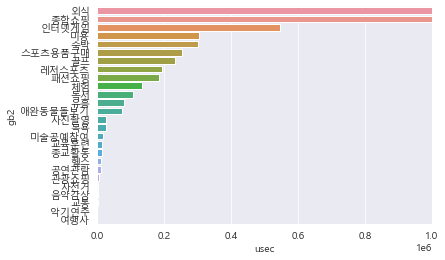

In [46]:
plt.rc('font', family='Malgun Gothic')     # 글꼴 세팅
sns.barplot(nouter.usec, nouter.gb2).set(xlim = (0,1e6))

In [38]:
innerdf = ndf[ndf.v1 == '충북']
ninner = innerdf.groupby('gb2').agg({
    'usec' : 'sum'
}).sort_values('usec', ascending = False).reset_index()
ninner

,gb2,usec
0,외식,22325165
1,종합쇼핑,15847232
2,미용,1434301
3,인터넷게임,1324265
4,스포츠용품구매,975195
5,패션쇼핑,682526
6,레저스포츠,388830
7,유흥,307744
8,애완동물돌보기,291745
9,골프,246622


C:\Users\styli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


[(0.0, 1000000.0)]

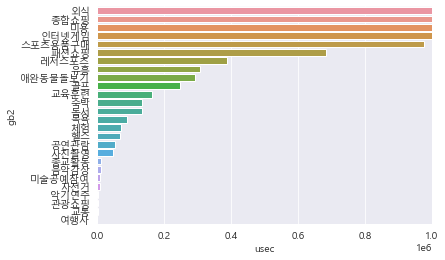

In [49]:
plt.rc('font', family='Malgun Gothic')     # 글꼴 세팅
sns.barplot(ninner.usec, ninner.gb2).set(xlim = (0,1e6))